# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314554 entries, 0 to 2314553
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21064
Address                             12
Zip Code                         14277
Council District                 47264
APD Sector                        9081
APD District                      9561
PRA                              10834
Census Tract                   1617752
Clearance Status                607447
Clearance Date                  338248
UCR Category                   1524301
Category Description           1524301
X-coordinate                     10247
Y-coordinate                     10247
Latitude                         39120
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2314549,20215007223,IDENTITY THEFT,4022,N,02/24/2021 12:00:00 PM,02/24/2021,1200.0,02/25/2021 09:21:00 AM,02/25/2021,921.0,OTHER / UNKNOWN,1419 BERKSHIRE DR,78723.0,1.0,ID,5,293.0,NaN,N,02/26/2021,NaN,NaN,3128690.0,3128690.0,30.316458,-97.695931,"(30.31645819, -97.69593054)"
2314550,20161211213,ASSAULT BY THREAT,901,N,04/30/2016 03:00:00 PM,04/30/2016,1500.0,04/30/2016 04:01:00 PM,04/30/2016,1601.0,RESIDENCE / HOME,9301 OLD BEE CAVES RD,78735.0,NaN,DA,6,45.0,NaN,N,05/04/2016,NaN,NaN,3064189.0,3064189.0,30.259883,-97.901829,"(30.25988292, -97.90182915)"
2314551,20043141761,VOCO AMPLIFIED MUSIC/VEHICLE,3218,N,11/09/2004 10:00:00 PM,11/09/2004,2200.0,11/09/2004 10:00:00 PM,11/09/2004,2200.0,STREETS / HWY / ROAD / ALLEY,N LAMAR BLVD / PAYTON GIN RD,78753.0,4.0,ED,1,237.0,NaN,C,11/29/2004,NaN,NaN,3127016.0,3127016.0,30.357646,-97.700113,"(30.35764573, -97.70011339)"
2314552,20135039080,BURGLARY OF VEHICLE,601,N,08/25/2013 11:00:00 PM,08/25/2013,2300.0,08/26/2013 05:04:00 PM,08/26/2013,1704.0,STREETS / HWY / ROAD / ALLEY,1405 BLAKENEY LN,78753.0,1.0,ED,7,223.0,NaN,N,08/27/2013,23F,Theft,3140141.0,3140141.0,30.383847,-97.657761,"(30.38384684, -97.65776054)"
2314553,2021541567,ASSAULT BY THREAT,901,N,02/23/2021 11:11:00 PM,02/23/2021,2311.0,02/23/2021 11:11:00 PM,02/23/2021,2311.0,RESIDENCE / HOME,9010 GALEWOOD DR,78758.0,4.0,ED,2,235.0,NaN,C,02/24/2021,NaN,NaN,3122208.0,3122208.0,30.367942,-97.715082,"(30.36794153, -97.71508242)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

830

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2313724 entries, 2003-01-01 to 2021-03-06
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21053
address                            12
zip_code                        14272
council_district                47246
apd_sector                       9077
apd_district                     9557
clearance_status               607212
clearance_date                 338088
latitude                        39092
longitude                       39092
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,IDENTITY THEFT,N,2007-02-05 14:13:00,RESIDENCE / HOME,4603 RIMROCK TRL,78723.0,1.0,CH,4,NaN,2007-02-07,30.290395,-97.683246,2003,1,1,1
2003-01-01,HARASSMENT,N,2003-04-05 09:12:00,RESIDENCE / HOME,11411 RESEARCH NB SVC RD,78759.0,6.0,AD,4,N,NaT,30.411708,-97.745061,2003,1,1,1
2003-01-01,THEFT,N,2003-01-01 20:04:00,BAR / NIGHT CLUB,402 E 6TH OLD PECAN ST,78701.0,NaN,GE,3,N,NaT,30.266925,-97.738797,2003,1,1,1
2003-01-01,THEFT OF AUTO PARTS,N,2003-01-01 14:58:00,PARKING LOTS / GARAGE,715 E 8TH ST,78701.0,9.0,GE,2,N,NaT,30.267553,-97.734674,2003,1,1,1
2003-01-01,THEFT OF SERVICE,N,2003-01-01 05:25:00,RESTAURANTS,5816 N I 35 SB SVC RD,78751.0,4.0,BA,4,N,NaT,30.319081,-97.707668,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-03-06,THEFT OF SERVICE,N,2021-03-06 10:32:00,RESIDENCE / HOME,6103 MANOR RD,78723.0,1.0,ID,4,NaN,NaT,30.307555,-97.678052,2021,3,9,6
2021-03-06,BURGLARY OF RESIDENCE,N,2021-03-06 18:57:00,RESIDENCE / HOME,803 BATTLE BEND BLVD,78745.0,3.0,DA,3,NaN,NaT,30.203381,-97.764727,2021,3,9,6
2021-03-06,VIOL OF PROTECTIVE ORDER,N,2021-03-06 03:08:00,RESIDENCE / HOME,1137 GUNTER ST,78721.0,1.0,CH,4,N,2021-03-06,30.269224,-97.695136,2021,3,9,6
2021-03-06,ASSAULT W/INJURY-FAM/DATE VIOL,Y,2021-03-06 18:59:00,STREETS / HWY / ROAD / ALLEY,6107 DERIDDER CT,78744.0,2.0,FR,7,N,2021-03-06,30.166931,-97.743156,2021,3,9,6
2021-03-06,PUBLIC INTOXICATION,N,2021-03-06 01:54:00,STREETS / HWY / ROAD / ALLEY,419 E 6TH ST,78701.0,9.0,GE,2,NaN,NaT,30.266648,-97.738697,2021,3,9,6


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207619
78753.0    180296
78701.0    168935
78758.0    159874
78704.0    155415
78745.0    151562
78702.0    137160
78744.0    126929
78723.0    119575
78752.0     84886
78748.0     68560
78759.0     66769
78751.0     64327
78757.0     58210
78705.0     57436
78721.0     47380
78749.0     40652
78724.0     37962
78727.0     36090
78703.0     35382
78731.0     28857
78746.0     28222
78729.0     25475
78750.0     23813
78754.0     23035
Name: zip_code, dtype: int64

78741.0    0.090291
78753.0    0.078408
78701.0    0.073468
78758.0    0.069527
78704.0    0.067588
78745.0    0.065912
78702.0    0.059649
78744.0    0.055200
78723.0    0.052002
78752.0    0.036916
78748.0    0.029816
78759.0    0.029037
78751.0    0.027975
78757.0    0.025315
78705.0    0.024978
78721.0    0.020605
78749.0    0.017679
78724.0    0.016509
78727.0    0.015695
78703.0    0.015387
78731.0    0.012550
78746.0    0.012273
78729.0    0.011079
78750.0    0.010356
78754.0    0.010018
Name: zip_code, dtype: float64

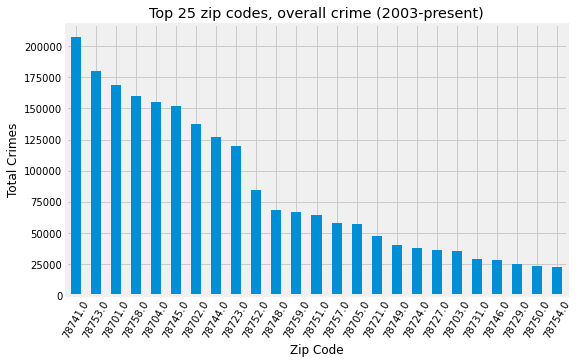

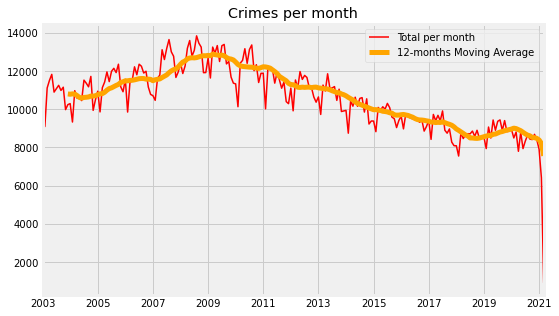

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231566
THEFT                             212343
FAMILY DISTURBANCE                180499
CRIMINAL MISCHIEF                 127978
ASSAULT W/INJURY-FAM/DATE VIOL     78376
BURGLARY OF RESIDENCE              77270
DWI                                69787
PUBLIC INTOXICATION                68827
HARASSMENT                         64513
DISTURBANCE - OTHER                61864
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,HARASSMENT,CRIMINAL MISCHIEF,ASSAULT W/INJURY-FAM/DATE VIOL,FAMILY DISTURBANCE,DWI,PUBLIC INTOXICATION,BURGLARY OF RESIDENCE,TOTAL
occurred_date,,,,,,,,,
2020-11-30,482,236,507,282,864,183,71,162,2787
2020-12-31,409,247,479,253,825,165,50,187,2615
2021-01-31,362,244,432,256,816,169,55,126,2460
2021-02-28,318,155,319,238,755,132,63,117,2097
2021-03-31,85,28,39,35,52,21,2,29,291


<Figure size 432x288 with 0 Axes>

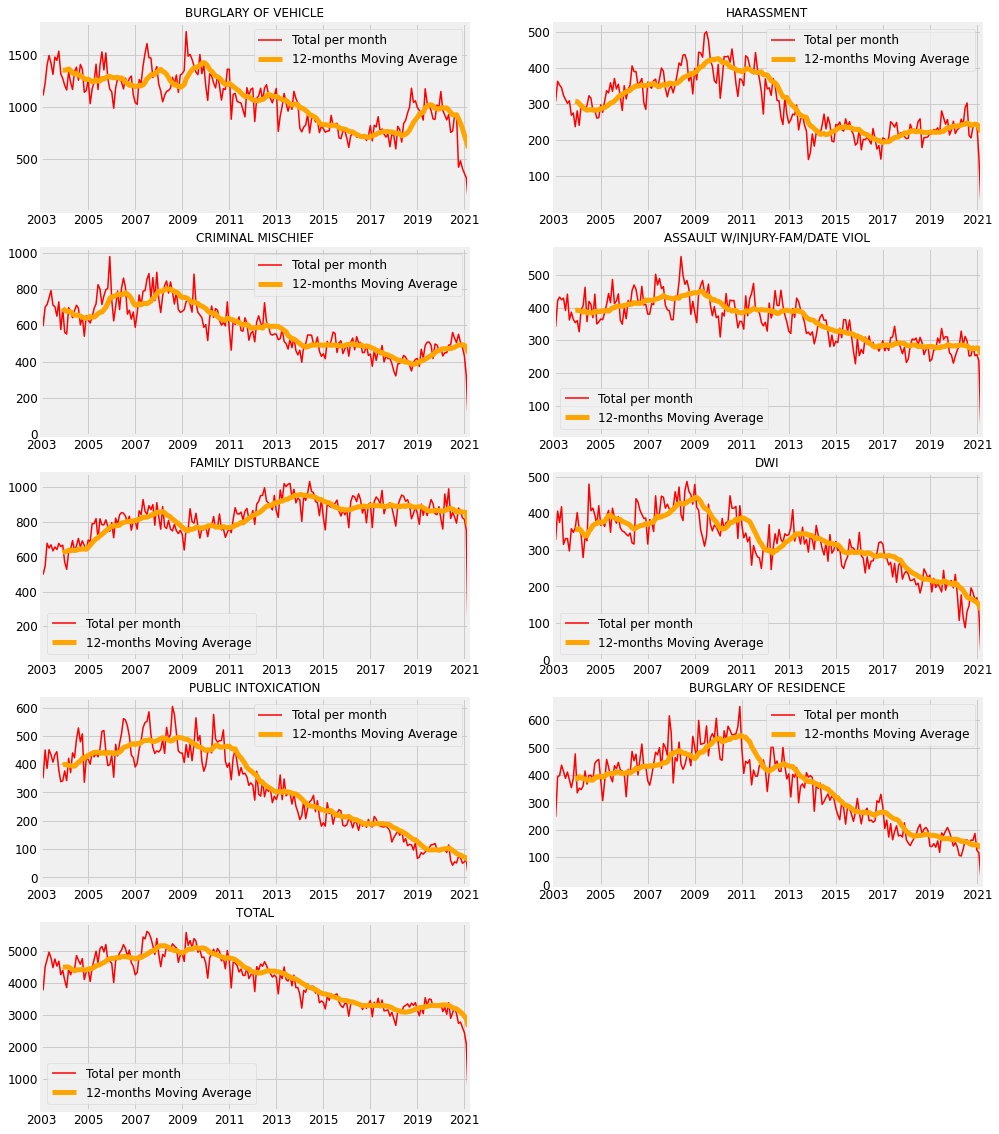

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17162
THEFT                             15816
BURGLARY OF VEHICLE                9281
WARRANT ARREST NON TRAFFIC         8965
DWI                                8329
ASSAULT WITH INJURY                7559
VIOL CITY ORDINANCE - OTHER        6186
POSS OF DRUG PARAPHERNALIA         6057
CRIMINAL MISCHIEF                  5838
CRIMINAL TRESPASS                  3928
POSSESSION OF MARIJUANA            3388
DISTURBANCE - OTHER                3367
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2906
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2599
CRIMINAL TRESPASS/TRANSIENT        2586
THEFT OF BICYCLE                   2521
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2178
DOC FIGHTING                       2113
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1733
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101589
THEFT                             0.093622
BURGLARY OF VEHICLE               0.054938
WARRANT ARREST NON TRAFFIC        0.053068
DWI                               0.049303
ASSAULT WITH INJURY               0.044745
VIOL CITY ORDINANCE - OTHER       0.036618
POSS OF DRUG PARAPHERNALIA        0.035854
CRIMINAL MISCHIEF                 0.034558
CRIMINAL TRESPASS                 0.023252
POSSESSION OF MARIJUANA           0.020055
DISTURBANCE - OTHER               0.019931
CUSTODY ARREST TRAFFIC WARR       0.017717
POSS CONTROLLED SUB/NARCOTIC      0.017202
CAMPING IN PARK                   0.016486
VOCO - ALCOHOL  CONSUMPTION       0.015923
ASSAULT BY CONTACT                0.015385
CRIMINAL TRESPASS/TRANSIENT       0.015308
THEFT OF BICYCLE                  0.014923
URINATING IN PUBLIC PLACE         0.013828
FAMILY DISTURBANCE                0.012893
DOC FIGHTING                      0.012508
PROTECTIVE ORDER                  0.012425
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

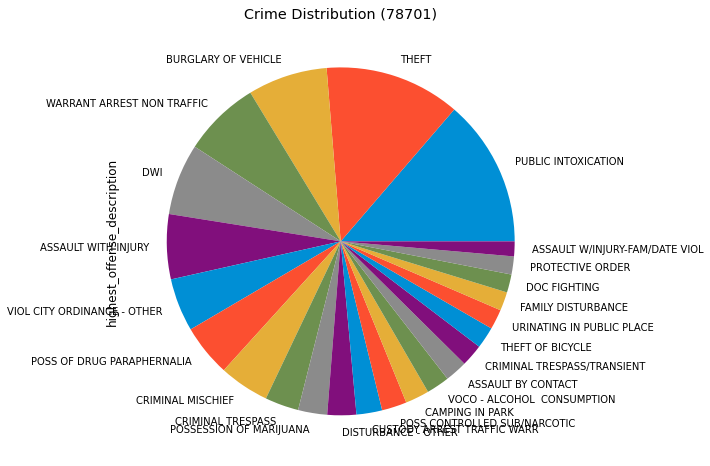

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17212
BURGLARY OF VEHICLE               15985
FAMILY DISTURBANCE                14737
CRIMINAL MISCHIEF                  9516
THEFT BY SHOPLIFTING               7652
ASSAULT W/INJURY-FAM/DATE VIOL     7195
BURGLARY OF RESIDENCE              6081
DWI                                5092
DISTURBANCE - OTHER                4795
CUSTODY ARREST TRAFFIC WARR        4393
HARASSMENT                         4273
AUTO THEFT                         4257
POSS OF DRUG PARAPHERNALIA         3747
PUBLIC INTOXICATION                3397
ASSAULT WITH INJURY                3333
CRIMINAL TRESPASS                  3158
POSS CONTROLLED SUB/NARCOTIC       2998
RUNAWAY CHILD                      2938
WARRANT ARREST NON TRAFFIC         2818
POSSESSION OF MARIJUANA            2731
BURGLARY NON RESIDENCE             2497
VIOL CITY ORDINANCE - OTHER        1881
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

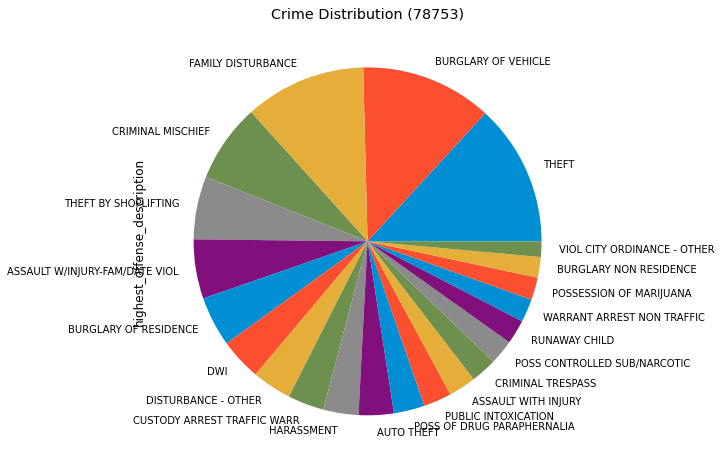

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20441
BURGLARY OF VEHICLE               19836
THEFT                             15631
CRIMINAL MISCHIEF                 11075
ASSAULT W/INJURY-FAM/DATE VIOL     9654
BURGLARY OF RESIDENCE              8897
PUBLIC INTOXICATION                6389
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5677
HARASSMENT                         5539
DISTURBANCE - OTHER                5182
AUTO THEFT                         4666
ASSAULT WITH INJURY                4550
CRIMINAL TRESPASS                  3933
POSS CONTROLLED SUB/NARCOTIC       3876
POSSESSION OF MARIJUANA            3794
THEFT BY SHOPLIFTING               3582
POSS OF DRUG PARAPHERNALIA         3544
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2798
VIOL CITY ORDINANCE - OTHER        2196
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098454
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

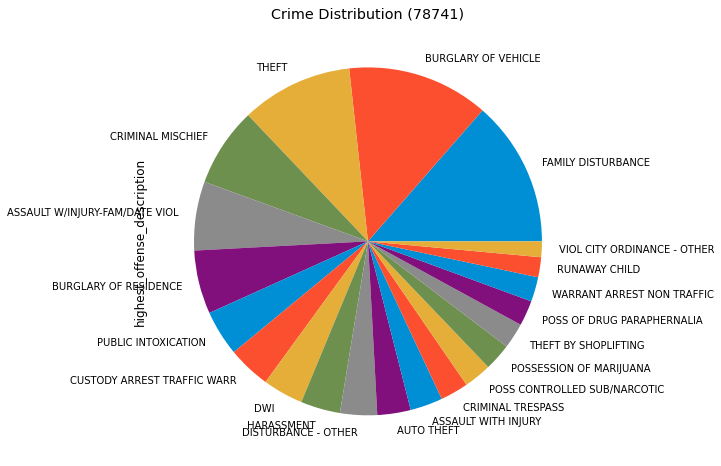

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15026
BURGLARY OF VEHICLE               14757
THEFT                             13603
CRIMINAL MISCHIEF                  8546
BURGLARY OF RESIDENCE              5876
ASSAULT W/INJURY-FAM/DATE VIOL     5773
HARASSMENT                         5160
DISTURBANCE - OTHER                4539
DWI                                4427
PUBLIC INTOXICATION                4001
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2881
AUTO THEFT                         2868
ASSAULT WITH INJURY                2683
RUNAWAY CHILD                      2607
POSSESSION OF MARIJUANA            2593
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2029
THEFT BY SHOPLIFTING               1995
CRIMINAL TRESPASS                  1961
IDENTITY THEFT                     1597
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

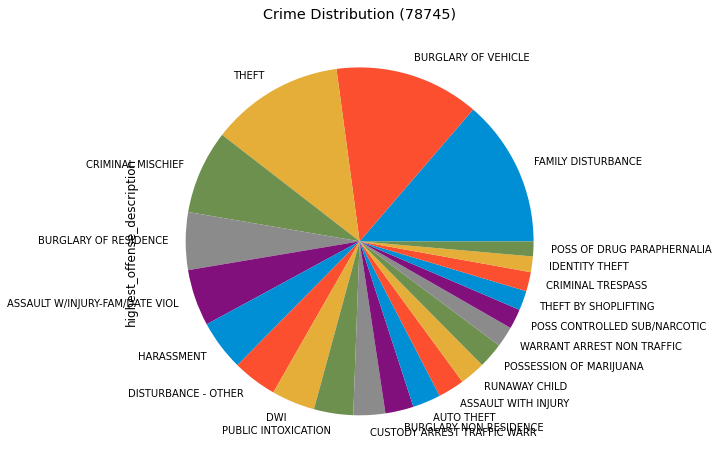

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8657
THEFT                             5632
CRIMINAL MISCHIEF                 4983
THEFT OF BICYCLE                  3501
PUBLIC INTOXICATION               2629
BURGLARY OF RESIDENCE             2126
WARRANT ARREST NON TRAFFIC        1549
CRIMINAL TRESPASS                 1353
AUTO THEFT                        1330
ASSAULT WITH INJURY               1257
HARASSMENT                        1221
DWI                               1212
FAMILY DISTURBANCE                1203
DISTURBANCE - OTHER               1119
BURGLARY NON RESIDENCE             884
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        793
GRAFFITI                           780
CUSTODY ARREST TRAFFIC WARR        780
ASSAULT W/INJURY-FAM/DATE VIOL     700
POSSESSION OF MARIJUANA            655
ASSAULT BY CONTACT                 622
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150724
THEFT                             0.098057
CRIMINAL MISCHIEF                 0.086757
THEFT OF BICYCLE                  0.060955
PUBLIC INTOXICATION               0.045773
BURGLARY OF RESIDENCE             0.037015
WARRANT ARREST NON TRAFFIC        0.026969
CRIMINAL TRESPASS                 0.023557
AUTO THEFT                        0.023156
ASSAULT WITH INJURY               0.021885
HARASSMENT                        0.021258
DWI                               0.021102
FAMILY DISTURBANCE                0.020945
DISTURBANCE - OTHER               0.019483
BURGLARY NON RESIDENCE            0.015391
CRIMINAL TRESPASS/TRANSIENT       0.015112
VIOL CITY ORDINANCE - OTHER       0.013807
GRAFFITI                          0.013580
CUSTODY ARREST TRAFFIC WARR       0.013580
ASSAULT W/INJURY-FAM/DATE VIOL    0.012187
POSSESSION OF MARIJUANA           0.011404
ASSAULT BY CONTACT                0.010829
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

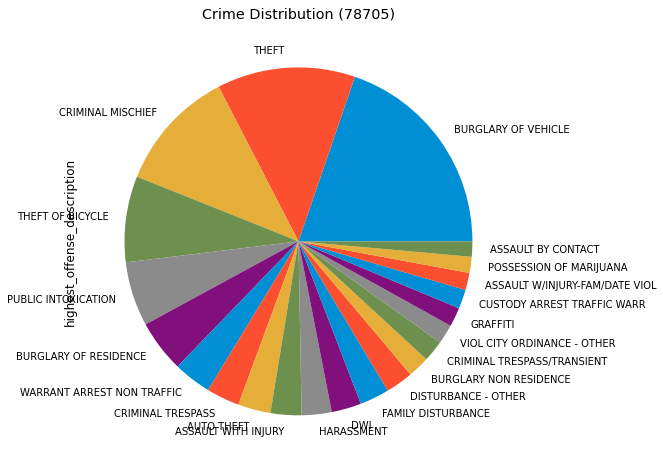

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5398
THEFT                             5093
THEFT BY SHOPLIFTING              2546
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 761
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         628
AUTO THEFT                         608
BURGLARY OF RESIDENCE              521
THEFT FROM PERSON                  462
DISTURBANCE - OTHER                433
IDENTITY THEFT                     433
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     339
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  257
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191269
THEFT                             0.180462
THEFT BY SHOPLIFTING              0.090213
CRIMINAL MISCHIEF                 0.045178
DWI                               0.031217
FAMILY DISTURBANCE                0.026965
VIOL CITY ORDINANCE - OTHER       0.023103
HARASSMENT                        0.022252
AUTO THEFT                        0.021543
BURGLARY OF RESIDENCE             0.018461
THEFT FROM PERSON                 0.016370
DISTURBANCE - OTHER               0.015343
IDENTITY THEFT                    0.015343
BURGLARY NON RESIDENCE            0.012650
ASSAULT W/INJURY-FAM/DATE VIOL    0.012012
CRED CARD ABUSE - OTHER           0.011551
PUBLIC INTOXICATION               0.011374
POSSESSION OF MARIJUANA           0.010559
FRAUD - OTHER                     0.009921
SUSPICIOUS PERSON                 0.009106
CUSTODY ARREST TRAFFIC WARR       0.008752
WARRANT ARREST NON TRAFFIC        0.007902
ASSAULT WITH INJURY               0.007016
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

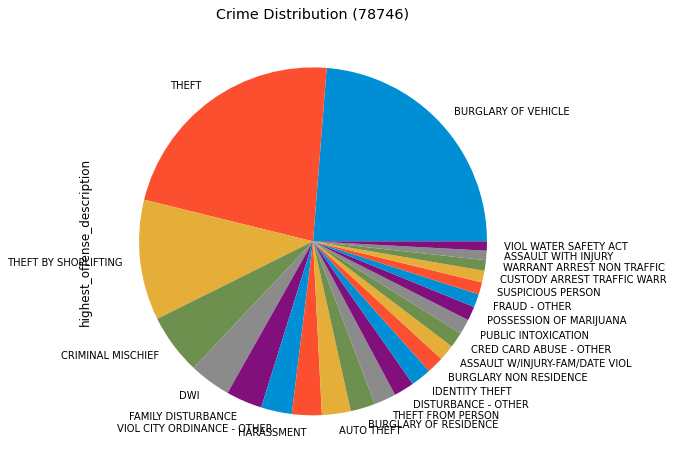

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130606
78753.0    0.099406
78758.0    0.094008
78723.0    0.074792
78701.0    0.074419
78702.0    0.074147
78745.0    0.057749
78752.0    0.052419
78744.0    0.052045
78704.0    0.048345
78721.0    0.027500
78724.0    0.024580
78705.0    0.021456
78757.0    0.020744
78748.0    0.017484
78751.0    0.017077
78759.0    0.013682
78722.0    0.009472
78754.0    0.008352
78727.0    0.007978
78749.0    0.007842
78617.0    0.007707
78729.0    0.007130
78750.0    0.005738
78731.0    0.005262
Name: zip_code, dtype: float64

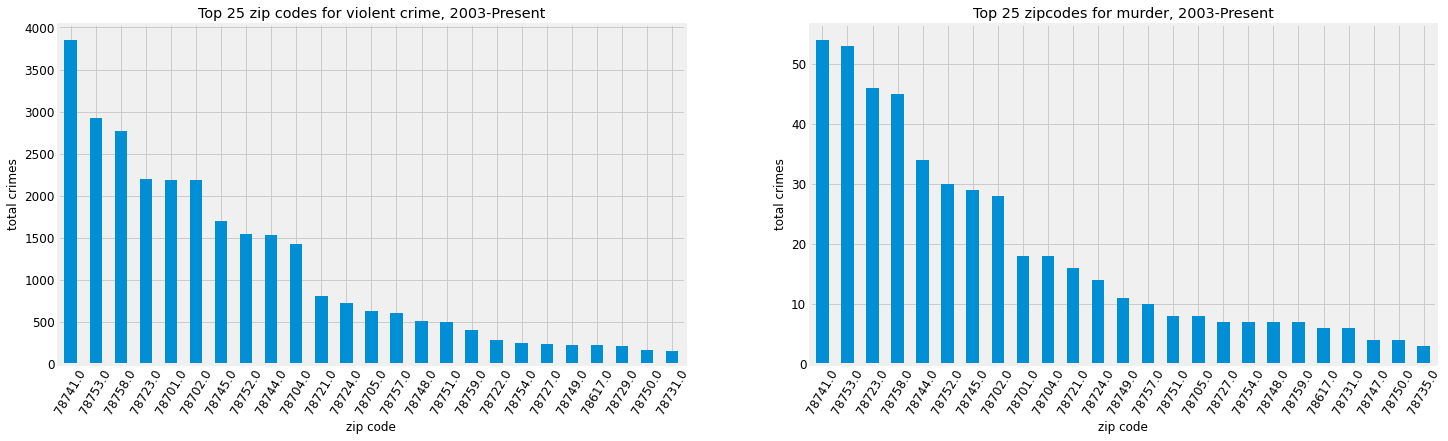

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

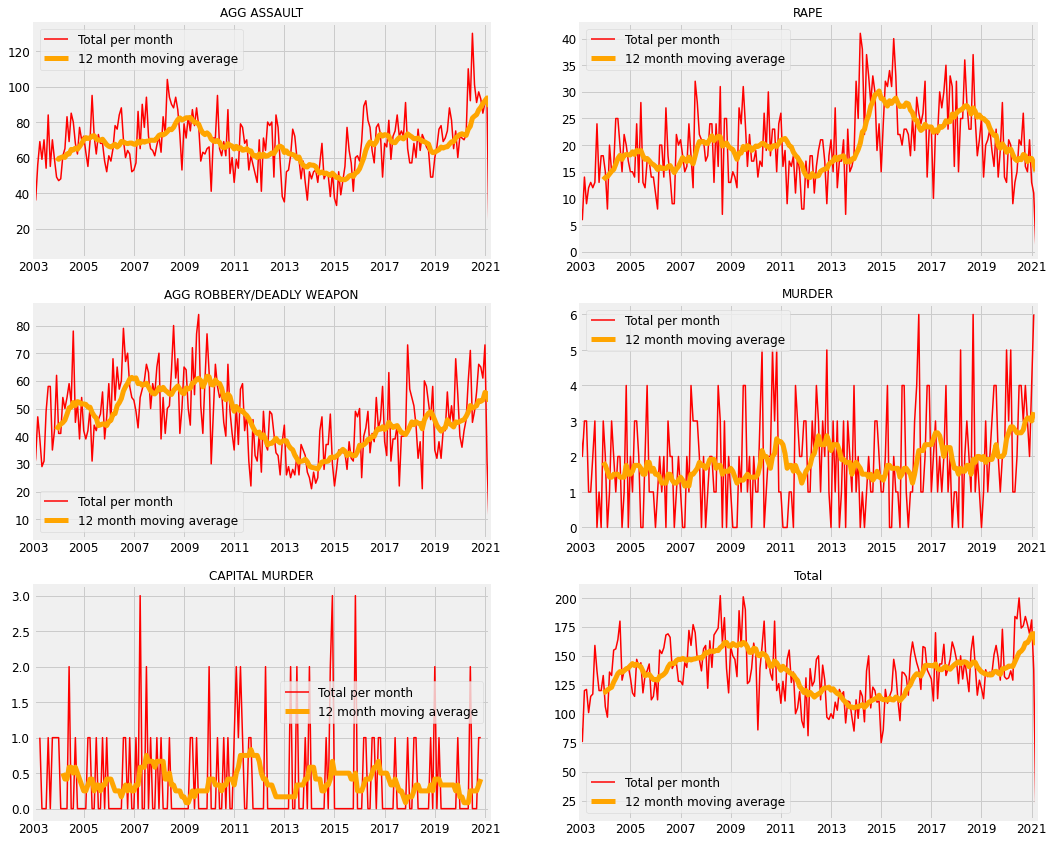

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

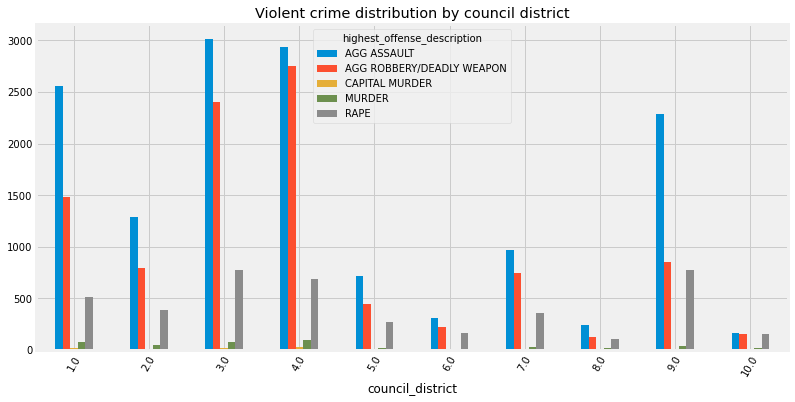

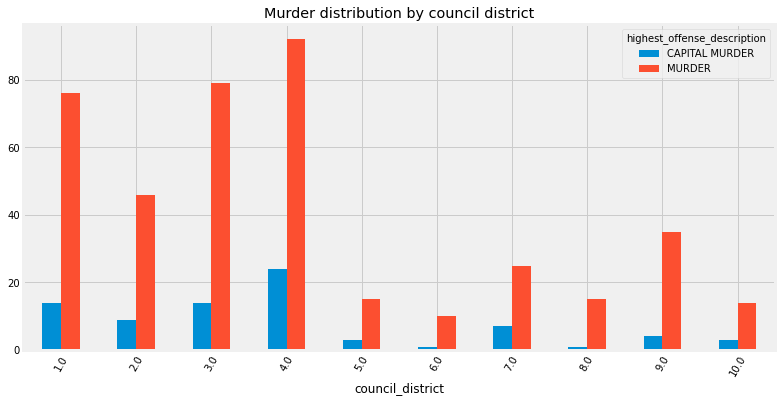

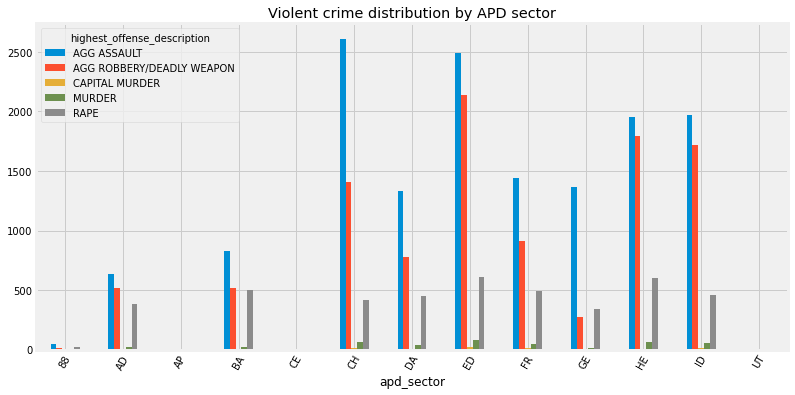

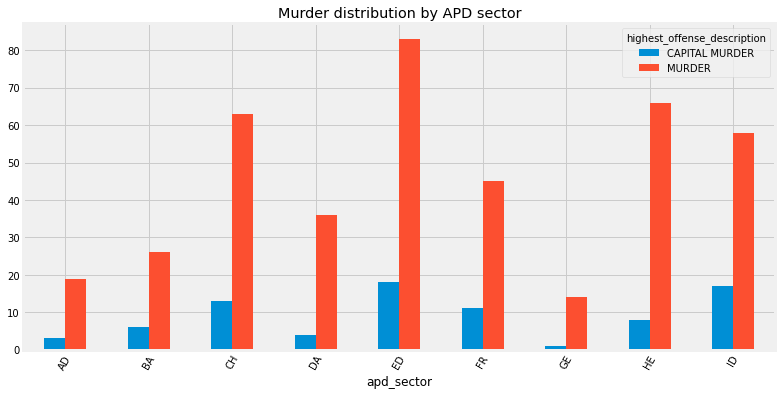

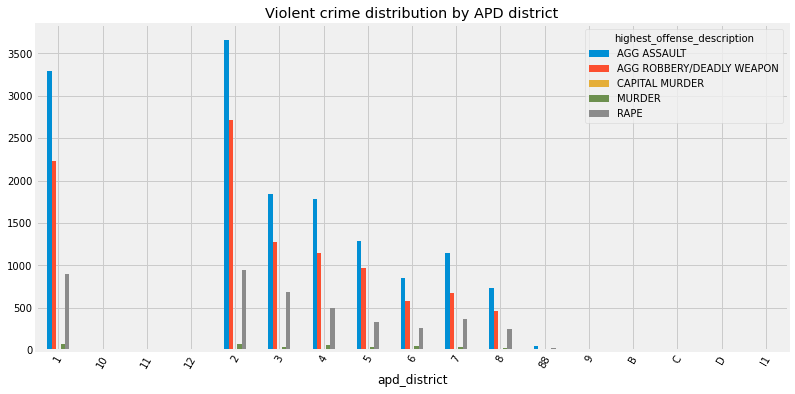

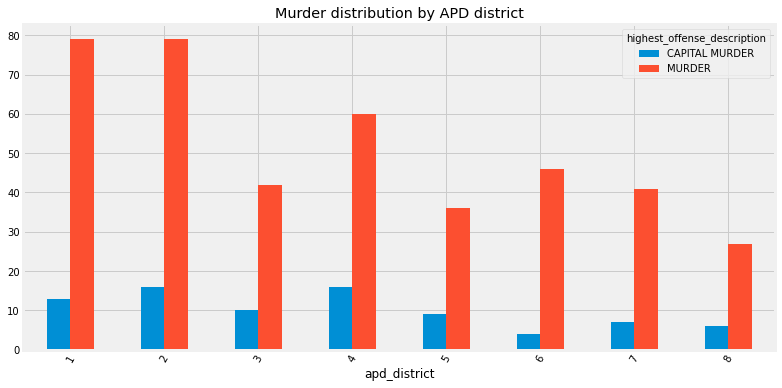

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,659,46,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


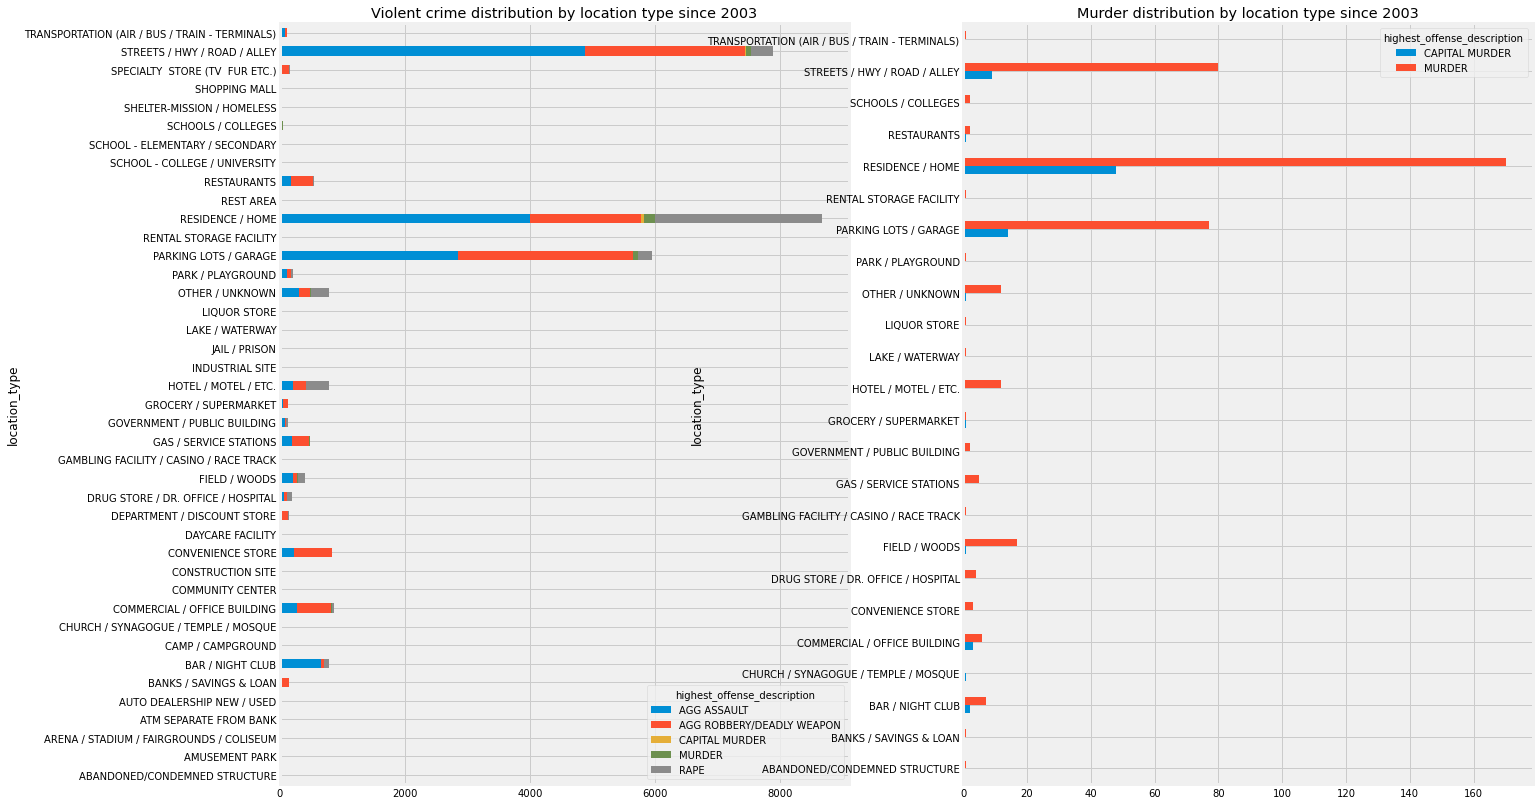

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11529
1030 NORWOOD PARK BLVD             9204
2901 S CAPITAL OF TEXAS HWY NB     8111
3600 PRESIDENTIAL BLVD             7345
500 E 7TH ST                       6110
1000 E 41ST ST                     5814
3708 S 2ND ST                      5254
2508 E RIVERSIDE DR                4824
11200 LAKELINE MALL DR             4499
9300 S IH 35 SVRD SB               4063
715 E 8TH ST                       4003
9414 N LAMAR BLVD                  3865
1137 GUNTER ST                     3201
710 E BEN WHITE BLVD SVRD WB       3195
6001 AIRPORT BLVD                  2923
12900 N IH 35 SVRD SB              2802
5800 TECHNI CENTER DR              2741
5901 AIRPORT BLVD                  2718
2701 E 7TH ST                      2710
6118 FAIRWAY ST                    2667
1300 CROSSING PL                   2630
1515 WICKERSHAM LN                 2440
6409 SPRINGDALE RD                 2436
2400 S CONGRESS AVE                2435
601 E 15TH ST                      2362


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
00 BLOCK UNKNOWN            59
6409 SPRINGDALE RD          59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         55
1071 CLAYTON LN             53
9200 NORTH PLZ              53
1030 NORWOOD PARK BLVD      53
1137 GUNTER ST              51
6103 MANOR RD               51
2237 E RIVERSIDE DR         51
Name: address, dtype: int64

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

4700 E RIVERSIDE DR          3
8610 N LAMAR BLVD            3
6407 SPRINGDALE RD           3
8800 N IH 35 SVRD SB         3
6409 SPRINGDALE RD           3
9200 NORTH PLZ               2
744 W WILLIAM CANNON DR      2
1711 RUTLAND DR              2
605 MASTERSON PASS           2
1050 SPRINGDALE RD           2
2508 E RIVERSIDE DR          2
2400 WICKERSHAM LN           2
601 E 15TH ST                2
201 W 5TH ST                 2
833 FAIRFIELD DR             2
9010 GALEWOOD DR             2
2915 S IH 35 SVRD NB         2
8225 SAM RAYBURN DR          2
815 W SLAUGHTER LN           2
1137 GUNTER ST               2
7000 DECKER LN               2
6118 FAIRWAY ST              2
8912 N LAMAR BLVD            2
6600 ED BLUESTEIN BLVD SB    2
2713 S CONGRESS AVE          2
10610 MORADO CIR             2
9220 N IH 35 SVRD SB         2
9601 MIDDLE FISKVILLE RD     2
10503 N LAMAR BLVD           2
2501 ANKEN DR                2
Name: address, dtype: int64

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")